#### Élianne Chavarie (11304082), Emmanuelle Legault (11305393), Antoine Laverdière-Allaire (11306200), Haon Amélie (11285931)


# Projet

### L'impact mondial sur l'environnement (émissions de CO2) de la production alimentaire entre 2000-2020

Dans le cadre de notre projet de programmation, nous avons exploré l'impact des activités agricoles sur les émissions de CO2. Nous avons utilisé une base de données détaillant les émissions attribuées à diverses sources liées à l'agriculture, ainsi que d'autres facteurs environnementaux, pour différents pays et années. Cette base de données comprend des informations sur les émissions dues aux incendies de savane et de forêt, aux résidus de récolte, à la culture du riz, aux sols organiques drainés, à la fabrication de pesticides et au transport alimentaire, parmi d'autres sources d'émissions. En plus, elle renseigne sur des aspects démographiques et climatiques tels que la population rurale et urbaine, les variations de température, offrant ainsi un panorama riche pour analyser l'impact environnemental global de la production agroalimentaire.

## Base de données exploitée

Nous allons d'abord commencer par importer notre base de données afin de faire une analyse du contenu de la base de données. Lire le fichier et stocker les données dans un DataFrame afin de procéder à la réponse aux questions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lire les données du fichier
with open("Agrofood_co2_emission.csv", "r", encoding="utf-8") as file:
    lines = file.readlines() 

# Stocker le fichier de la base de données dans un DataFrame
df_foodco2 = pd.read_csv("Agrofood_co2_emission.csv")

df_foodco2

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


### À noter
#### Décision de précision
Puisqu'il y a plus de 6 000 observations depuis 1990 dans notre base de données choisie, nous avons décidé de nous concentrer sur les 20 dernières années

In [2]:
# Calculer le nombre d'observations faites entre 2000 et 2020
df_2000_2020 = df_foodco2[(df_foodco2['Year'] >= 2000) & (df_foodco2['Year'] <= 2020)]
df_2000_2020

nombre_observations_len = len(df_2000_2020)
print(f"Nombre d'observations de 2000 à 2020: {nombre_observations_len}")

Nombre d'observations de 2000 à 2020: 4760


Nous avons ici 4760 lignes d'observations, ce qui est conforme aux instructions du projet

### À noter
Dans le cadre de notre analyse, nous avons besoin de créer une variable prenant en compte la somme des émissions de CO2 (en unités correspondantes) pour les activités agricoles par année et par région. 

Nous avons alors créer la colonne 'Total Agricultural Activities' que nous utiliserons ensuite pour bâtir une analyse solide.

In [3]:
# Sélection des colonnes spécifiées par l'utilisateur pour le calcul de "Total Agricultural Activities"
columns_to_sum = [
    "Crop Residues", "Rice Cultivation", 
    "Drained organic soils (CO2)", "Pesticides Manufacturing", "Food Transport",
    "On-farm energy use", "Food Packaging", "Agrifood Systems Waste Disposal", "Food Processing",
    "Fertilizers Manufacturing", "IPPU", "Manure applied to Soils", "Manure left on Pasture",
    "Manure Management"]

# Vérification de l'existence de toutes les colonnes nécessaires
missing_columns = [col for col in columns_to_sum if col not in df_2000_2020.columns]

if not missing_columns:
    # Création d'une copie du DataFrame pour éviter le SettingWithCopyWarning
    df_2000_2020 = df_2000_2020.copy()
    
    # Calcul de la somme des colonnes spécifiées pour chaque ligne pour créer la nouvelle variable
    df_2000_2020['Total Agricultural Activities'] = df_2000_2020[columns_to_sum].sum(axis=1)
else:
    missing_columns

# Afficher le DataFrame mis à jour
df_2000_2020

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Total Agricultural Activities
10,Afghanistan,2000,22.7810,0.7111,168.8070,509.6000,0.0,11.712073,38.5560,-2388.8030,...,0.0,0.0,NaN,15657474.0,4436282.0,9815442.0,9727541.0,3113.528415,0.975667,5296.829215
11,Afghanistan,2001,0.2219,0.0000,170.9884,474.3200,0.0,11.712073,39.1935,121.9016,...,0.0,0.0,NaN,16318324.0,4648139.0,9895467.0,9793166.0,5038.533968,1.408917,4704.247968
12,Afghanistan,2002,9.0562,0.0000,266.1975,529.2000,0.0,11.712073,37.5246,121.9016,...,0.0,0.0,NaN,17086910.0,4893013.0,10562202.0,10438055.0,6035.816468,1.084167,5660.178268
13,Afghanistan,2003,55.8052,0.0000,324.2195,568.4000,0.0,11.712073,60.7014,121.9016,...,0.0,0.0,NaN,17909063.0,5155788.0,11397483.0,11247647.0,6449.089231,0.679333,5996.530731
14,Afghanistan,2004,11.9759,0.0000,266.9995,764.4000,0.0,11.712073,48.7587,121.9016,...,0.0,0.0,NaN,18692107.0,5426872.0,11862726.0,11690825.0,6734.998231,1.398833,6296.302731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,8782.981147
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,7481.002553
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,7675.499005
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,8941.245599


## Partie 1 : Questions d'introduction à notre analyse

### Question 1.1 : Quelle est la tendance globale des émissions de CO2 entre 2000 et 2020 ?

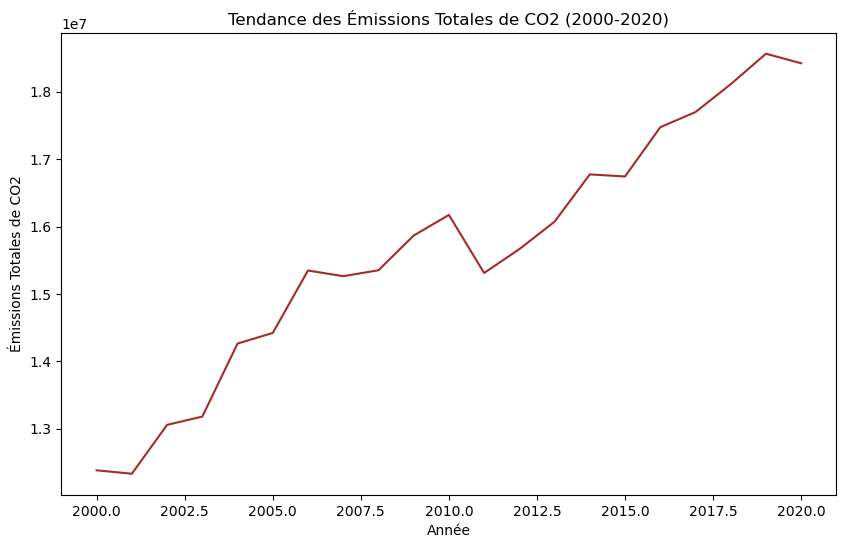

In [4]:
# Aggrégation des émissions totales de CO2 par année
emissions_par_annee = df_2000_2020.groupby("Year")["total_emission"].sum().reset_index()

# Visualisation de la tendance des émissions totales de CO2
plt.figure(figsize=(10, 6))
sns.lineplot(data=emissions_par_annee, x="Year", y="total_emission",color = 'brown')
plt.title("Tendance des Émissions Totales de CO2 (2000-2020)")
plt.xlabel("Année")
plt.ylabel("Émissions Totales de CO2")
plt.show()

L'analyse de la tendance des émissions de CO2 entre 2000 et 2020 indique clairement l'urgence d'intensifier les efforts de réduction des émissions pour combattre le changement climatique. Une tendance à la hausse nécessite des actions immédiates, tandis qu'une stabilisation ou une réduction signale une avancée vers les objectifs climatiques. Ces résultats soulignent l'importance cruciale de poursuivre les innovations et les politiques durables.

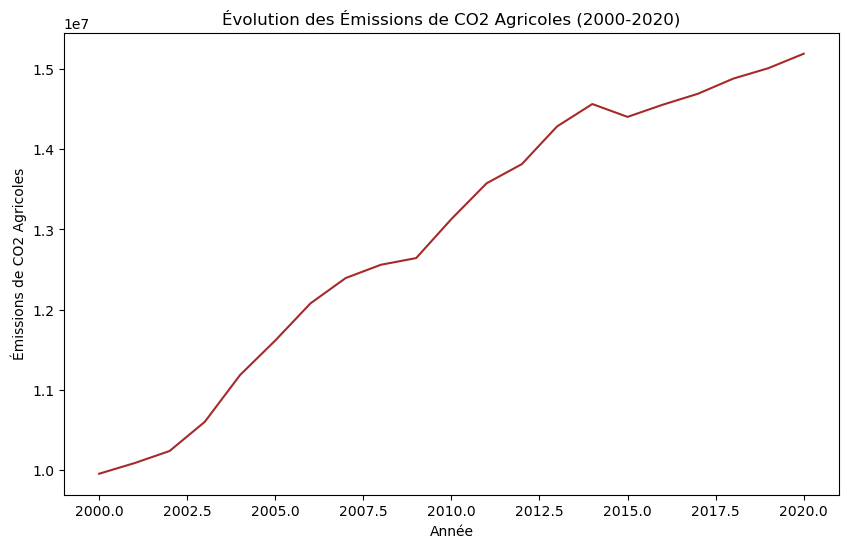

In [5]:
# Agréger les émissions agricoles par année
emissions_agricoles_par_annee = df_2000_2020.groupby('Year')['Total Agricultural Activities'].sum().reset_index()

# Tracer le graphique de l'évolution des émissions agricoles
plt.figure(figsize=(10, 6))
sns.lineplot(data=emissions_agricoles_par_annee, x="Year", y="Total Agricultural Activities",color = 'brown')
plt.title("Évolution des Émissions de CO2 Agricoles (2000-2020)")
plt.xlabel("Année")
plt.ylabel("Émissions de CO2 Agricoles")
plt.show()

L'analyse des tendances des émissions de CO2 agricoles de 2000 à 2020 révèle l'efficacité des pratiques et politiques agricoles vis-à-vis du changement climatique. Une hausse des émissions soulignerait la nécessité de méthodes agricoles plus durables, tandis qu'une tendance à la baisse signalerait des progrès vers une agriculture moins impactante. Cette évolution est cruciale pour guider les efforts futurs de réduction des émissions dans le secteur.

### Question 1.2 : Quels produits agroalimentaires ont le plus fort impact en termes d'émissions de CO2 ?

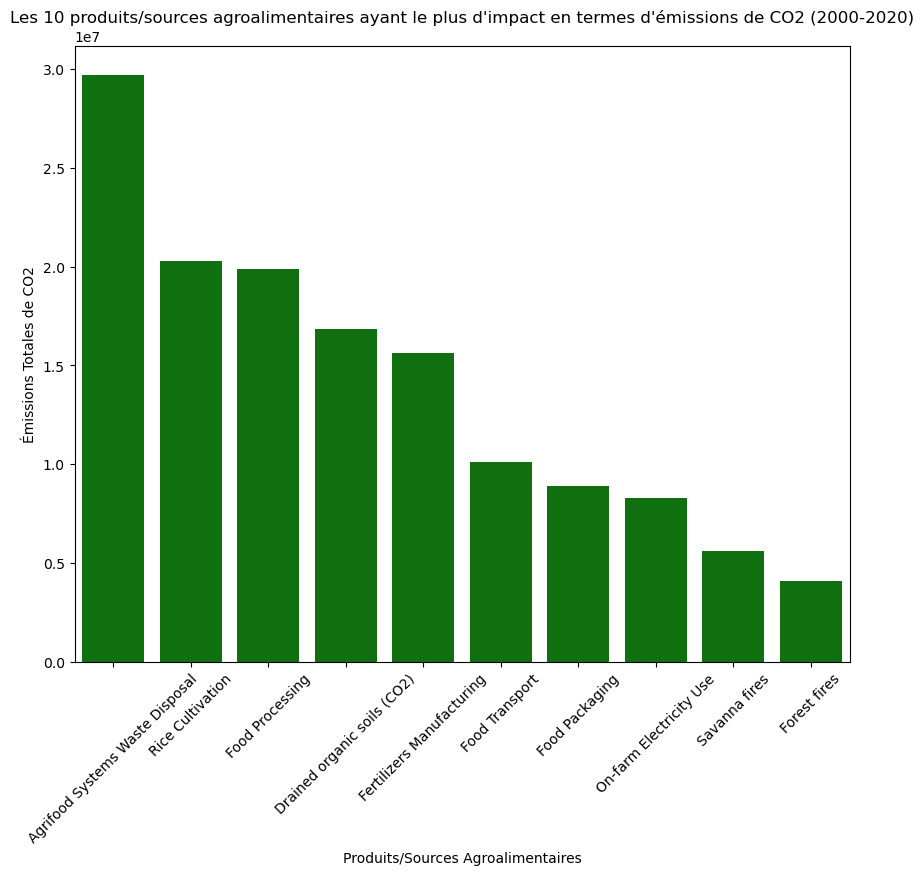

In [5]:
# Définition des colonnes/sources d'émissions spécifiques à l'agriculture
sources_agricoles = ["Crop Residues", "Rice Cultivation", "Forest fires", 
                     "Savanna fires", "Drained organic soils (CO2)", "Pesticides Manufacturing", 
                     "Food Transport", "On-farm Electricity Use", "Food Packaging", "Agrifood Systems Waste Disposal", 
                     "Food Processing", "Fertilizers Manufacturing"]

# Aggrégation des émissions par source pour identifier les plus impactantes
emissions_par_source = df_2000_2020[sources_agricoles].sum().sort_values(ascending=False)

# Sélection des 10 sources les plus impactantes
top10_sources_emissions = emissions_par_source.head(10)

# Conversion de la série en DataFrame pour la visualisation
top10_sources_df = top10_sources_emissions.reset_index()
top10_sources_df.columns = ['Source', 'Émissions Totales de CO2']

# Création du graphique
plt.figure(figsize=(10, 8))
sns.barplot(data=top10_sources_df, x='Source', y='Émissions Totales de CO2', color = 'green')
plt.title("Les 10 produits/sources agroalimentaires ayant le plus d'impact en termes d'émissions de CO2 (2000-2020)")
plt.xlabel("Produits/Sources Agroalimentaires")
plt.ylabel("Émissions Totales de CO2")

# Ajustement des étiquettes de l'axe des x
plt.xticks(rotation=45)
plt.show()

Le graphique illustre clairement que, parmi les produits et pratiques analysés entre 2000 et 2020, la gestion des déchets des systèmes agroalimentaires, la culture du riz, et la transformation des aliments se distinguent comme les sources les plus importantes d'émissions de CO2 dans le secteur agricole. L'impact disproportionné de ces sources suggère que des efforts ciblés pour améliorer la gestion des déchets, optimiser les pratiques de culture du riz, et rendre la transformation des aliments plus efficace pourraient contribuer significativement à la réduction des émissions globales de ce secteur. Cette analyse nous aide à identifier les secteurs clés au sein des activités agricoles et alimentaires qui ont un impact significatif sur les émissions de CO2, mettant en évidence les domaines potentiels pour des initiatives de durabilité et de réduction de l'empreinte carbone.

### Question 1.3 : Quel Pays a les plus hautes émissions de CO2 liées à l'agriculture entre 2000 et 2022

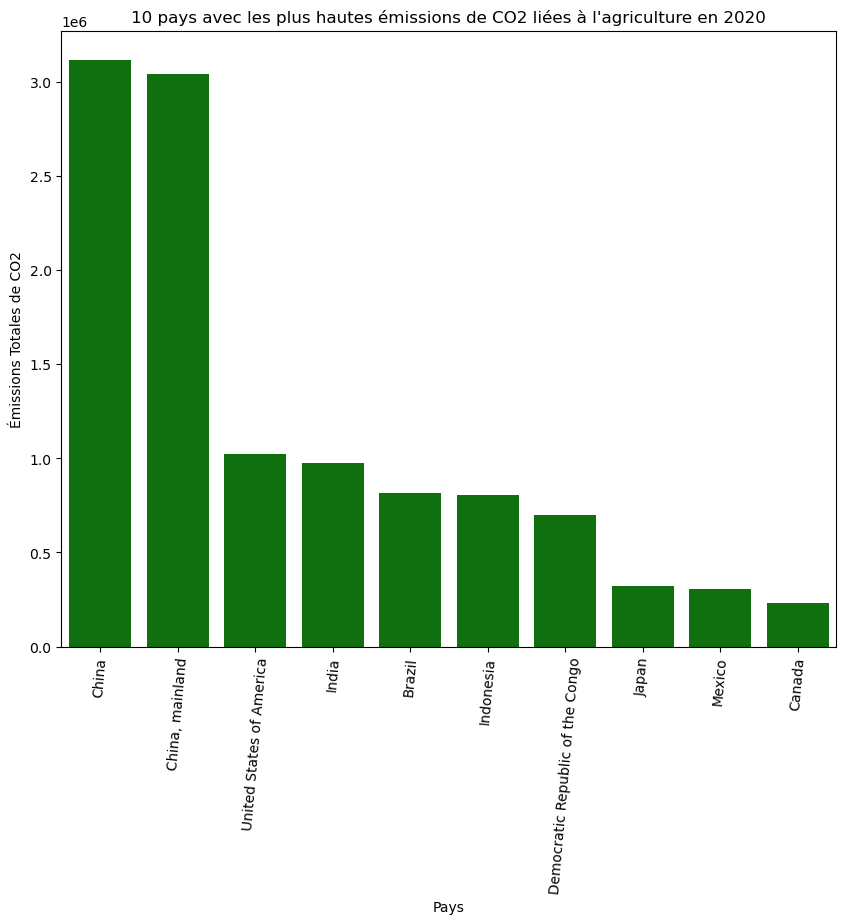

In [6]:
# Aggrégation des émissions totales de CO2 par pays pour l'année la plus récente dans la plage 2000-2020
annee_plus_recente = df_2000_2020['Year'].max()
emissions_par_pays_recentes = df_2000_2020[df_2000_2020['Year'] == annee_plus_recente].groupby('Area')['total_emission'].sum().sort_values(ascending=False)

# Sélection des 10 pays avec les émissions les plus élevées pour l'année la plus récente
top10_emissions_pays_recentes = emissions_par_pays_recentes.head(10)

# Convertir la série en DataFrame
top10_emissions_pays_recentes_df = top10_emissions_pays_recentes.reset_index()

# Création du graphique avec les axes inversés
plt.figure(figsize=(10,8))
sns.barplot(data=top10_emissions_pays_recentes_df, x="Area", y="total_emission", color = 'green')
plt.title(f"10 pays avec les plus hautes émissions de CO2 liées à l'agriculture en {annee_plus_recente}")
plt.xlabel("Pays")
plt.ylabel("Émissions Totales de CO2")

#ajuster l'axe des x
plt.xticks(rotation=85)
plt.show()

Le graphique montre clairement que la Chine et la Thaïlande mènent par une large marge en tant que principaux émetteurs de CO2 liés à l'agriculture en 2020, suivis par les États-Unis et l'Inde. Cela indique que ces pays pourraient bénéficier significativement de pratiques agricoles améliorées et d'une gestion plus durable des ressources. La répartition des émissions souligne l'importance d'aborder les politiques agricoles et environnementales à l'échelle nationale tout en tenant compte des spécificités et des échelles des économies agricoles de chaque pays pour réduire efficacement leur contribution aux émissions globales de gaz à effet de serre.

### Question 1.4 : Quelle est la relation entre les émissions de CO2 dues aux pratiques agricoles et les variations de température moyenne ?


#### Choix de la Méthode de Corrélation

Pour l'analyse des corrélations dans notre projet, nous avons consulté ChatGPT pour une évaluation préliminaire de la distribution de nos données. ChatGPT a analysé les types de données selon la loi normale pour déterminer quelle mesure de corrélation serait la plus appropriée.

#### Pourquoi la Corrélation de Spearman?

1. **Non-normalité des Données :** Nos variables continues ne suivent pas une distribution normale, ce qui rend la corrélation de Pearson moins fiable.

2. **Robustesse aux Outliers :** La corrélation de Spearman est non-paramétrique et moins sensible aux valeurs aberrantes, ce qui est crucial compte tenu de la présence d'outliers significatifs dans notre dataset.

3. **Relations Non-linéaires :** Cette méthode mesure les associations monotones, idéale pour les relations potentiellement non-linéaires entre des variables comme les émissions de CO2 et la température moyenne.

#### Conclusion

En tenant compte de ces aspects, nous utilisons la corrélation de Spearman pour assurer une analyse robuste et fiable des relations entre les variables de notre étude.

C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


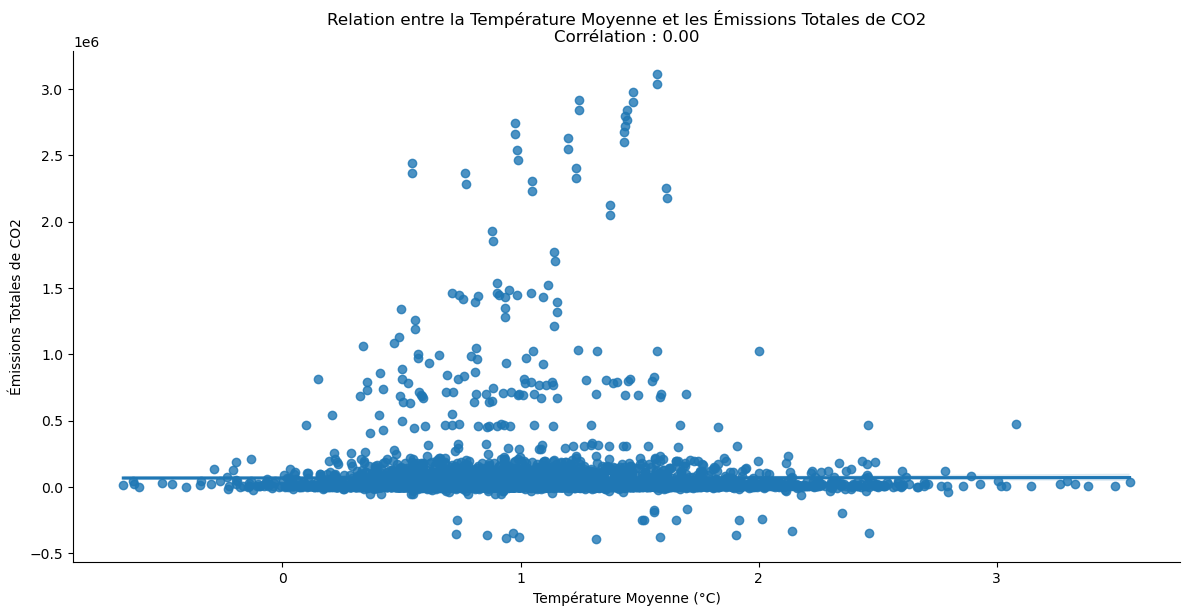

C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


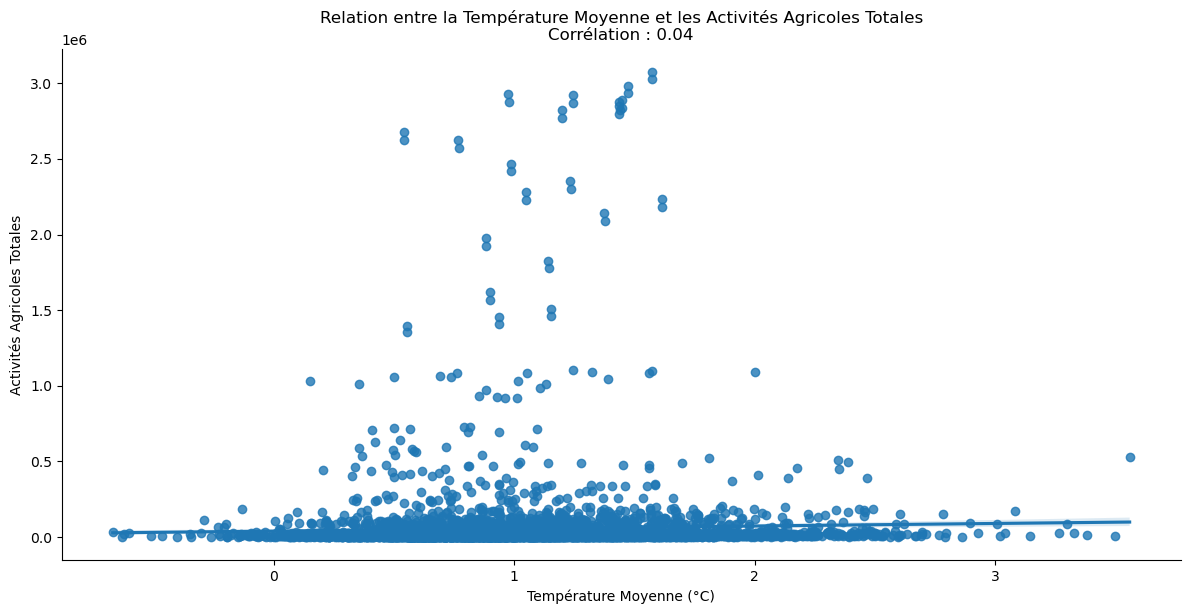

Corrélation entre la température moyenne et les émissions totales de CO2 : 0.00
Les variables ont une corrélation faible/inexistante.
La corrélation est positive.
Corrélation entre la température moyenne et les activités agricoles totales : 0.04
Les variables ont une corrélation faible/inexistante.
La corrélation est positive.


In [7]:
# Calculer les corrélations spécifiques
correlation_temp_total_emission = df_2000_2020['Average Temperature °C'].corr(df_2000_2020['total_emission'])
correlation_temp_agri_activities = df_2000_2020['Average Temperature °C'].corr(df_2000_2020['Total Agricultural Activities'])

# Étape 1 : Relation entre les émissions totales de CO2 et la température moyenne
sns.lmplot(x='Average Temperature °C', y='total_emission', data=df_2000_2020, aspect=2, height=6)
plt.title(f"Relation entre la Température Moyenne et les Émissions Totales de CO2\nCorrélation : {correlation_temp_total_emission:.2f}")
plt.xlabel("Température Moyenne (°C)")
plt.ylabel("Émissions Totales de CO2")
plt.show()

# Étape 2 : Relation entre les émissions totales dues aux activités agricoles et la température moyenne
sns.lmplot(x='Average Temperature °C', y='Total Agricultural Activities', data=df_2000_2020, aspect=2, height=6)
plt.title(f"Relation entre la Température Moyenne et les Activités Agricoles Totales\nCorrélation : {correlation_temp_agri_activities:.2f}")
plt.xlabel("Température Moyenne (°C)")
plt.ylabel("Activités Agricoles Totales")
plt.show()

# Affichage des corrélations calculées
print(f"Corrélation entre la température moyenne et les émissions totales de CO2 : {correlation_temp_total_emission:.2f}")
if correlation_temp_total_emission > 0.7:
    print("Les variables ont une corrélation forte.")
    if correlation_temp_total_emission > 0:
        print("La corrélation est positive.")
    else:
        print("La corrélation est négative.")
elif 0.4 <= correlation_temp_total_emission <= 0.59:
    print("Les variables ont une corrélation modérée.")
    if correlation_temp_total_emission > 0:
        print("La corrélation est positive.")
    else:
        print("La corrélation est négative.")
else:
    print("Les variables ont une corrélation faible/inexistante.")
    if correlation_temp_total_emission > 0:
        print("La corrélation est positive.")
    else:
        print("La corrélation est négative.")

print(f"Corrélation entre la température moyenne et les activités agricoles totales : {correlation_temp_agri_activities:.2f}")
if correlation_temp_agri_activities > 0.7:
    print("Les variables ont une corrélation forte.")
    if correlation_temp_agri_activities > 0:
        print("La corrélation est positive.")
    else:
        print("La corrélation est négative.")
elif 0.4 <= correlation_temp_agri_activities <= 0.59:
    print("Les variables ont une corrélation modérée.")
    if correlation_temp_agri_activities > 0:
        print("La corrélation est positive.")
    else:
        print("La corrélation est négative.")
else:
    print("Les variables ont une corrélation faible/inexistante.")
    if correlation_temp_agri_activities > 0:
        print("La corrélation est positive.")
    else:
        print("La corrélation est négative.")

Les deux graphiques examinent la relation entre la température moyenne et les émissions de CO2, à la fois globales et spécifiquement agricoles. La corrélation proche de zéro dans les deux cas indique qu'il n'y a pas de lien linéaire direct significatif entre la température moyenne et les émissions de CO2 pour les données examinées. Cela suggère que d'autres facteurs, au-delà de la température moyenne, jouent un rôle prépondérant dans les émissions de CO2 et que l'impact de la température sur les émissions agricoles peut être indirect ou masqué par la variabilité d'autres influences. Ces résultats mettent en lumière la complexité des systèmes climatiques et agricoles et la nécessité d'explorer plus en détail les interactions entre climat et émissions.

###  Question 1.5 : Quels sont les impacts potentiels des émissions de CO2 sur les phénomènes climatiques extrêmes ?

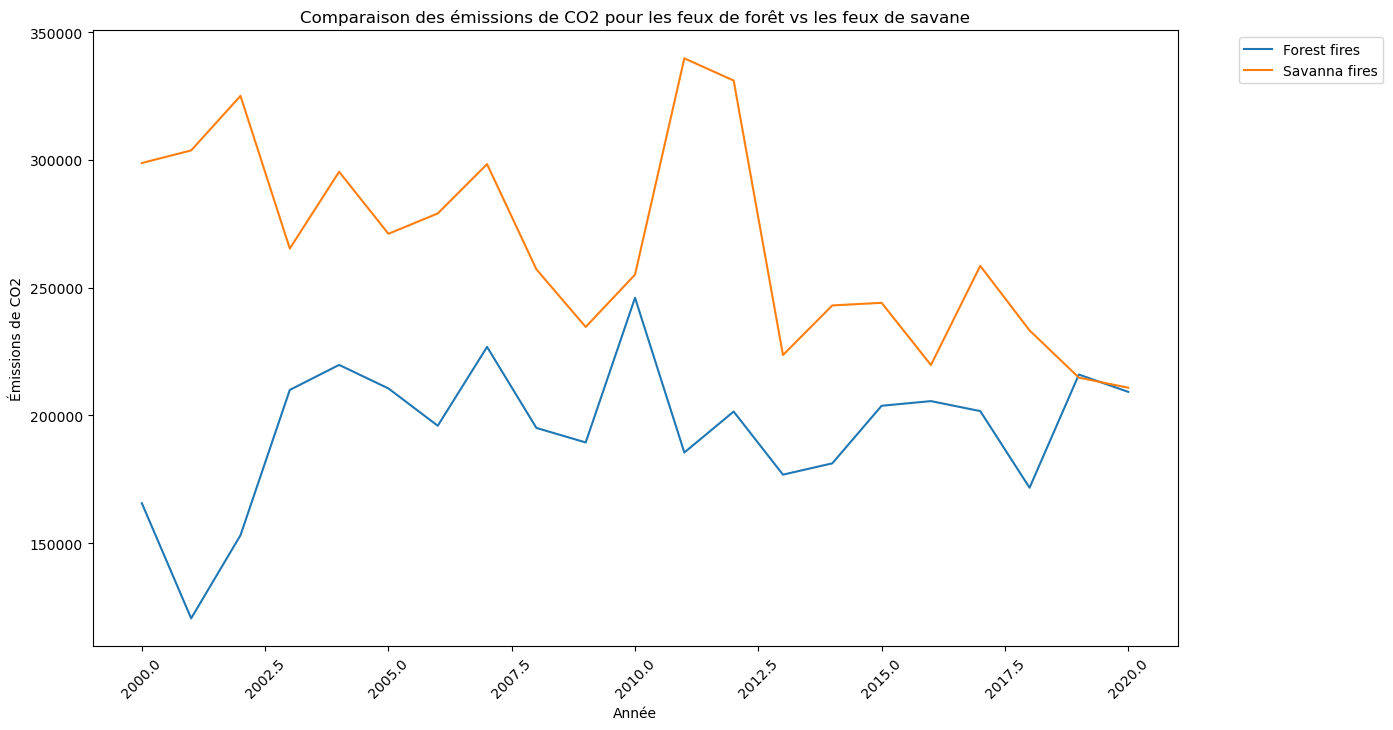

In [8]:
# Analyse des tendances des incendies de forêt et de savane par rapport aux émissions de CO2
# Aggrégation des données
df_incendies_tendance = df_2000_2020.groupby('Year').agg({'Forest fires': 'sum', 'Savanna fires': 'sum', 'total_emission': 'sum'}).reset_index()

# Structurer les données en une seule colonne pour les valeurs d'émissions de CO2 et une autre colonne indiquant le type d'incendie.
df_structure = pd.melt(df_incendies_tendance, id_vars='Year', value_vars=['Forest fires', 'Savanna fires'], 
                  var_name='type_incendie', value_name='emissions')

# Création du graphique comparant les émissions de CO2 pour les feux de forêt vs les feux de savane
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_structure, x='Year', y='emissions', hue='type_incendie')
plt.xlabel('Année')
plt.ylabel('Émissions de CO2')
plt.title('Comparaison des émissions de CO2 pour les feux de forêt vs les feux de savane')

# Ajustement des étiquettes de l'axe des x
plt.xticks(rotation=45)

# Déplacement de la légende
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

Le graphique montre les tendances des émissions de CO2 dues aux incendies de forêt et de savane au fil des ans. Il est clair que les émissions de CO2 liées aux feux de forêt et de savane varient significativement d'une année à l'autre, reflétant la nature sporadique des incendies et leur dépendance à une multitude de facteurs environnementaux et humains. Bien que les données ne montrent pas directement l'impact sur les phénomènes climatiques extrêmes, elles suggèrent que les incendies de forêt et de savane sont des sources importantes d'émissions de CO2, qui peuvent contribuer au changement climatique et, par conséquent, influencer la fréquence et l'intensité des événements climatiques extrêmes. Ces résultats indiquent la nécessité d'une gestion plus efficace des incendies de végétation pour atténuer les émissions de CO2 et réduire leur potentiel d'impact sur le climat.

## Partie 2 : Questions d'analyse 

### Question 2.1 : Quel est l'impact des incendies de savane et de forêt sur les émissions de CO2 dans le secteur agroalimentaire?

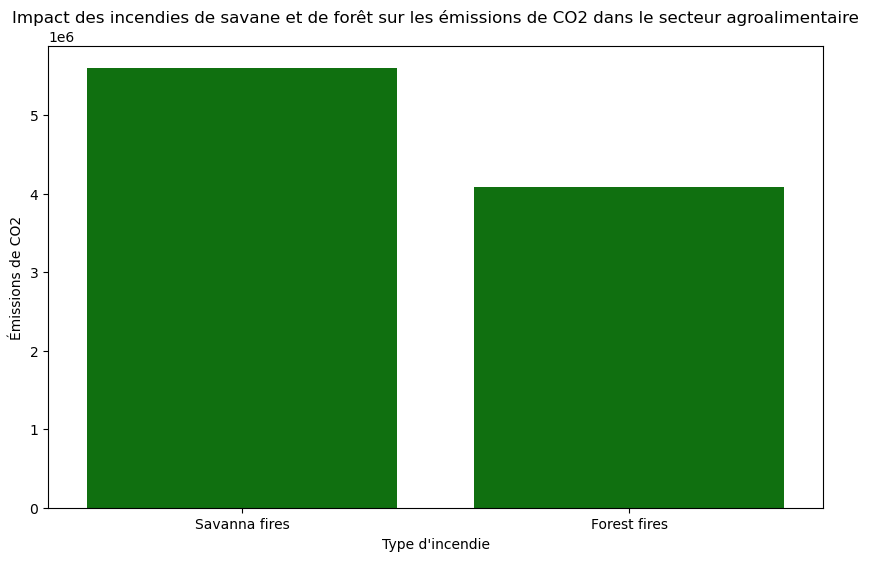

In [9]:
# Sélectionner les colonnes pertinentes pour l'analyse
selected_columns = ["Savanna fires", "Forest fires", "total_emission"]

# Supprimer les lignes avec des valeurs manquantes dans ces colonnes
data_cleaned = df_2000_2020[selected_columns].dropna()

# Calculer la somme des émissions de CO2 pour les incendies de savane et les incendies de forêt
total_co2_by_fire_type = data_cleaned[selected_columns[:-1]].sum()

# Convertir la série en DataFrame pour la visualisation
total_co2_df = total_co2_by_fire_type.reset_index()
total_co2_df.columns = ["Type d'incendie", "Émissions de CO2"]

# Créer une visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x="Type d'incendie", y="Émissions de CO2", data=total_co2_df, color='green')
plt.title("Impact des incendies de savane et de forêt sur les émissions de CO2 dans le secteur agroalimentaire")
plt.xlabel("Type d'incendie")
plt.ylabel("Émissions de CO2")
plt.show()

Le graphique indique que les incendies de savane sont responsables d'une plus grande quantité d'émissions de CO2 par rapport aux incendies de forêt dans le contexte agroalimentaire. Cela suggère que les incendies de savane pourraient jouer un rôle plus significatif dans les émissions de gaz à effet de serre du secteur que les incendies forestiers, mettant en lumière l'importance de cibler la prévention et la gestion des incendies dans les savanes pour les stratégies d'atténuation du CO2. Ces informations sont essentielles pour élaborer des politiques et des pratiques de gestion des terres qui réduisent les incendies dans les zones agricoles et contribuent ainsi à la lutte contre le changement climatique.

### Question 2.2 : Les émissions de CO2 sont-elles corrélées avec des facteurs démographiques (comme la population rurale) ou climatiques (comme les variations de température) ?

In [10]:
# Sélection des colonnes pertinentes
facteurs_correlation = ['total_emission', 'Rural population', 'Average Temperature °C']

# Filtrage du DataFrame pour ne garder que les colonnes d'intérêt
filtered_data = df_2000_2020[facteurs_correlation]

# Calcul des corrélations
correlation_matrix = filtered_data.corr()

# Voir la matrice de corrélation
correlation_matrix

,total_emission,Rural population,Average Temperature °C
total_emission,1.000000,0.756112,0.001605
Rural population,0.756112,1.000000,-0.027585
Average Temperature °C,0.001605,-0.027585,1.000000


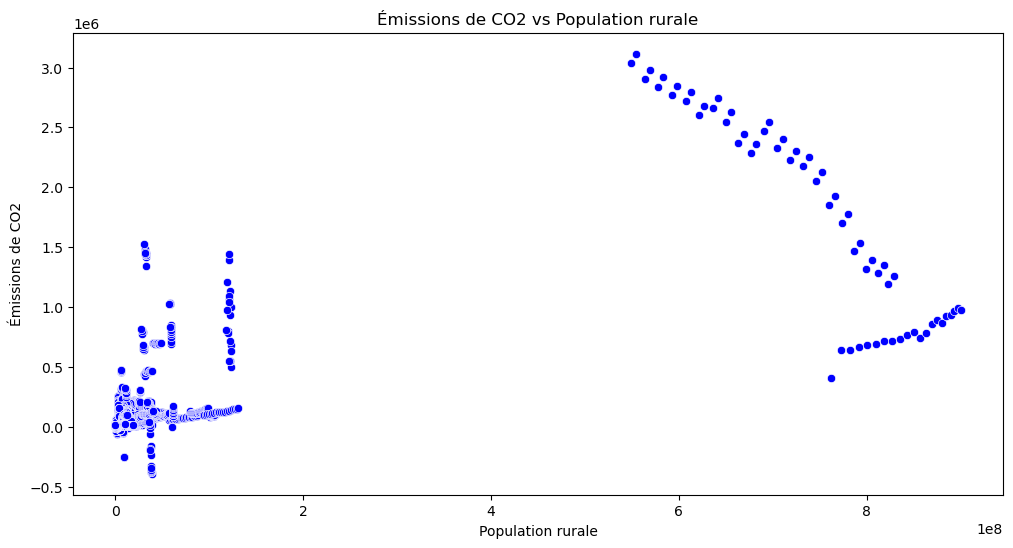

In [11]:
#Création des graphiques pour comparaison des facteurs et analyse de la corrélation
# Émissions de CO2 vs Population rurale
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rural population', y='total_emission', data=filtered_data, color="blue", marker="o")
plt.title('Émissions de CO2 vs Population rurale')
plt.xlabel('Population rurale')
plt.ylabel('Émissions de CO2')
plt.show()

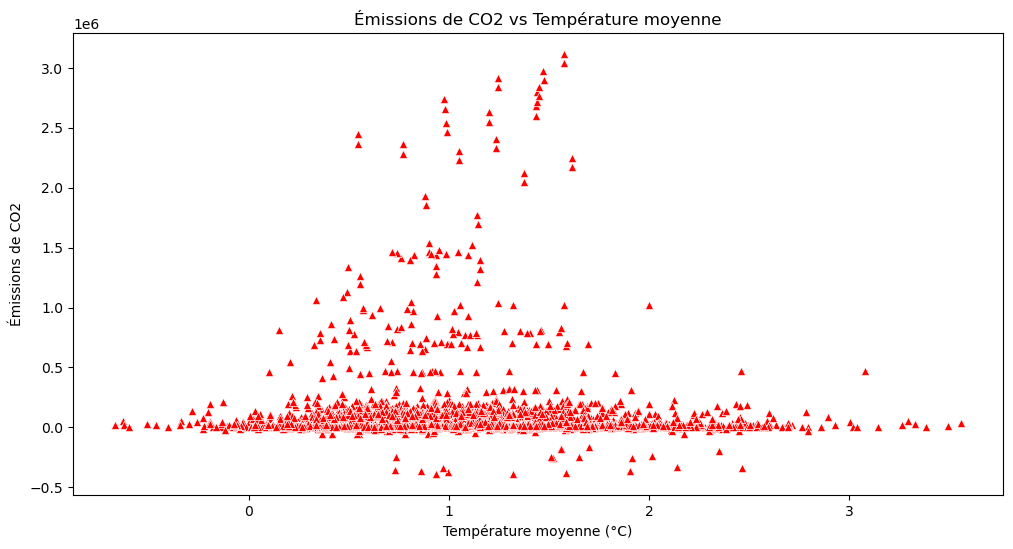

In [12]:
# Émissions de CO2 vs Température moyenne
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average Temperature °C', y='total_emission', data=filtered_data, color="red", marker="^")
plt.title('Émissions de CO2 vs Température moyenne')
plt.xlabel('Température moyenne (°C)')
plt.ylabel('Émissions de CO2')
plt.show()

Les graphiques suggèrent une relation non linéaire entre les émissions de CO2 et les deux variables étudiées: la population rurale et la température moyenne. Dans le premier graphique, l'absence de tendance claire ou de motif indique qu'il n'y a pas de relation directe et évidente entre la population rurale et les émissions de CO2. Le second graphique montre également une dispersion large des données sans tendance linéaire marquée entre la température moyenne et les émissions de CO2. Ensemble, ces observations suggèrent que des facteurs supplémentaires doivent être pris en compte pour comprendre pleinement les émissions de CO2, et que la relation avec les variables démographiques et climatiques peut être influencée par une variété d'autres facteurs environnementaux et économiques.

### Question 2.3 : Y a-t-il une corrélation entre la croissance de la population rurale et les émissions de CO2 liées à la production alimentaire au fil du temps ?

Text(0.5, 1.0, 'Évolution de la population rurale au cours des 20 dernières années')

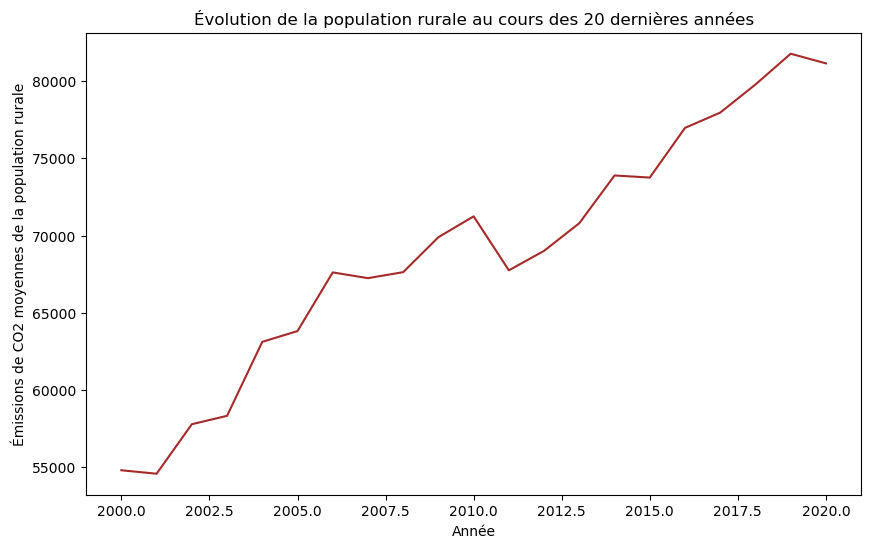

In [13]:
# Sélectionner les colonnes pertinentes pour l'analyse (année, population rurale et émissions de CO2)
selected_columns = ["Year", "Rural population", "total_emission"]

# Supprimer les lignes avec des valeurs manquantes dans ces colonnes
data = df_2000_2020[selected_columns].dropna()

# Calculer la moyenne de la population rurale pour chaque année
average_rural_population = data.groupby("Year")["total_emission"].mean().reset_index()

# Créer une visualisation de l'évolution de la population rurale au cours des 20 dernières années
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rural_population, x="Year", y="total_emission", color='brown')
plt.xlabel("Année")
plt.ylabel("Émissions de CO2 moyennes de la population rurale")
plt.title("Évolution de la population rurale au cours des 20 dernières années")

Le graphique montre une tendance générale à la hausse des émissions de CO2 moyennes liées à la population rurale au cours des deux dernières décennies. Cela indique que, malgré une prise de conscience croissante et des efforts pour réduire les émissions, les activités rurales liées à la production alimentaire ont contribué à une augmentation des émissions de CO2. Cette tendance ascendante pourrait refléter divers facteurs, comme l'augmentation de la production agricole pour répondre à la demande d'une population mondiale croissante et la dépendance continue à des méthodes de production moins efficaces et plus intensives en carbone. Ces observations suggèrent la nécessité d'accélérer le développement et l'adoption de pratiques agricoles plus durables pour inverser cette tendance.

### Question 2.4 : Comment les émissions de CO2 liées à la culture du riz ont-elles évolué en moyenne au cours des deux dernières décennies ?

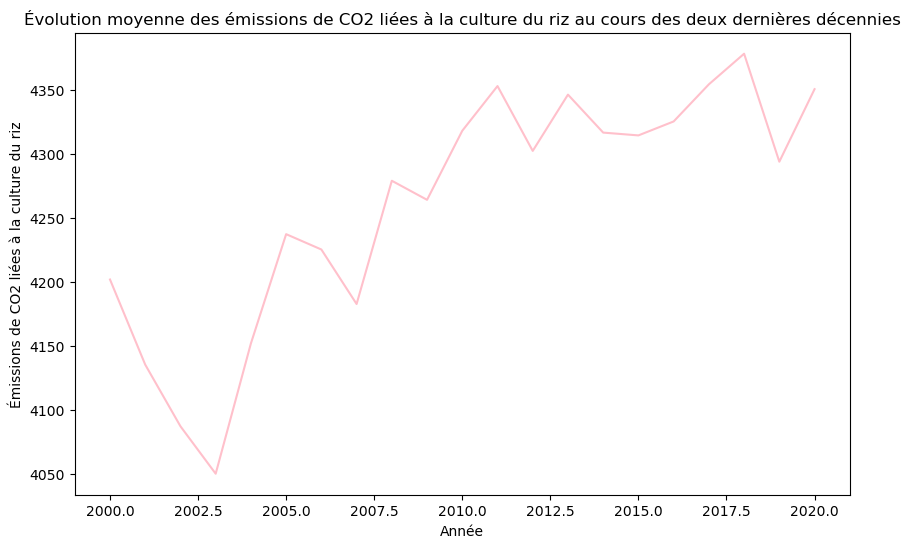

In [14]:
# Sélectionner les colonnes pertinentes pour l'analyse (année et émissions de CO2 liées à la culture du riz)
selected_columns = ["Year", "Rice Cultivation"]

# Supprimer les lignes avec des valeurs manquantes dans ces colonnes
data = df_2000_2020[selected_columns].dropna()

# Calculer la moyenne des émissions de CO2 liées à la culture du riz pour chaque année
average_rice_co2_emissions = data.groupby("Year")["Rice Cultivation"].mean().reset_index()

# Créer une visualisation de l'évolution des émissions de CO2 liées à la culture du riz au cours des deux dernières décennies
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rice_co2_emissions, x="Year", y="Rice Cultivation",color='pink')
plt.xlabel("Année")
plt.ylabel("Émissions de CO2 liées à la culture du riz")
plt.title("Évolution moyenne des émissions de CO2 liées à la culture du riz au cours des deux dernières décennies")
plt.show()

Le graphique indique une fluctuation générale des émissions de CO2 attribuables à la culture du riz au cours des deux dernières décennies, avec une tendance générale à la hausse. Bien qu'il y ait des baisses occasionnelles, la tendance est à l'augmentation, ce qui suggère que la culture du riz est devenue plus émettrice en CO2, ou que sa production a augmenté. Cela pourrait refléter une intensification des pratiques agricoles ou une expansion de la culture du riz pour répondre à la demande croissante, soulignant le besoin de pratiques de riziculture plus durables et moins émettrices de carbone pour atténuer leur impact sur le changement climatique.

### Question 2.5 : Quelles sont les 20 pays avec la contribution la plus élevée des sols organiques drainés aux émissions de CO2 agricoles  ?

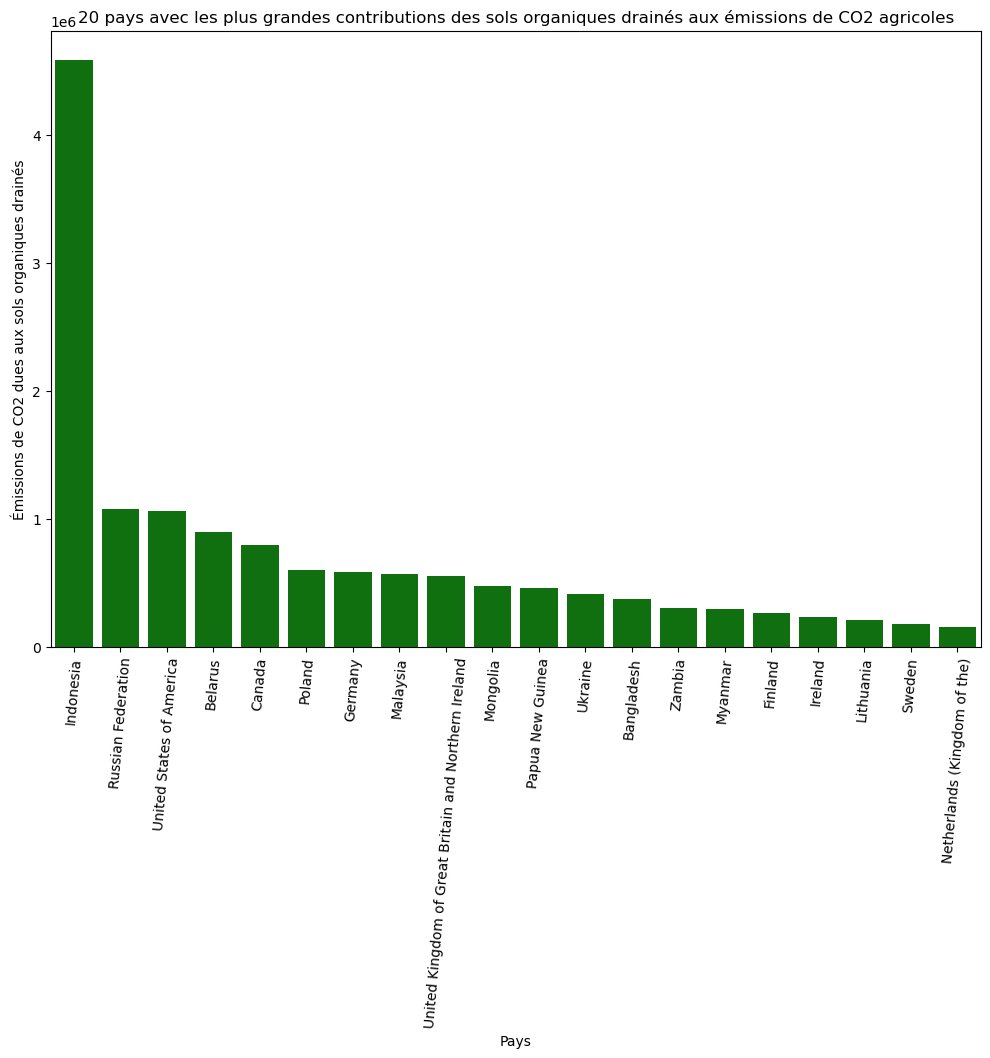

In [15]:
# Grouper les données par pays et calculer la somme des émissions de CO2 dues aux sols organiques drainés
grouped_data = df_2000_2020.groupby("Area")["Drained organic soils (CO2)"].sum()

# Sélectionner les 20 premiers pays avec les plus grandes contributions
top_20_countries = grouped_data.nlargest(20)

# Transformation de 'top_20_countries' en DataFrame
top_20_countries_df = top_20_countries.reset_index()
top_20_countries_df.columns = ["Area", "Drained organic soils (CO2)"]

# Création du graphique
plt.figure(figsize=(12, 8))
sns.barplot(y="Drained organic soils (CO2)", x="Area", data=top_20_countries_df,color='green')
plt.title("20 pays avec les plus grandes contributions des sols organiques drainés aux émissions de CO2 agricoles")
plt.xlabel("Pays")
plt.ylabel("Émissions de CO2 dues aux sols organiques drainés")

# Ajustement de l'axe des x pour favoriser la lisibilité
plt.xticks(rotation=85)
plt.show()

Le graphique démontre clairement que l'Indonésie, la Fédération de Russie et les États-Unis sont les trois principaux contributeurs aux émissions de CO2 agricoles dues aux sols organiques drainés. Ces résultats soulignent l'importance significative des pratiques de gestion des sols dans les contributions globales aux émissions de gaz à effet de serre. Ils indiquent également des cibles potentielles pour les initiatives de réduction des émissions, suggérant que des améliorations dans la gestion des sols organiques drainés dans ces pays pourraient avoir un impact considérable sur les émissions agricoles globales de CO2.

### Question 2.6 : Quels sont les principaux facteurs contribuant aux émissions de CO2 dans le secteur agroalimentaire en 2020 ?

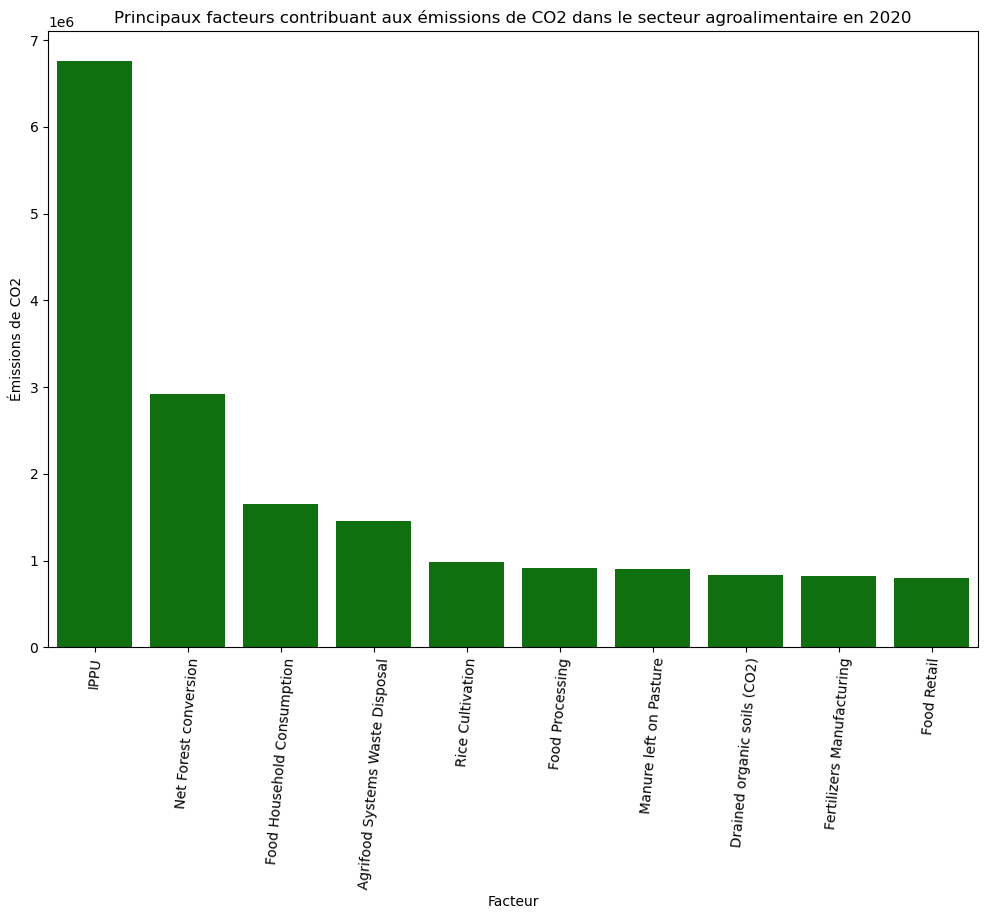

In [16]:
# Filtrer les données pour l'année 2020
data_2020 = df_2000_2020[df_2000_2020['Year'] == 2020]

# Sélectionner les colonnes pertinentes pour l'analyse des facteurs de CO2
selected_columns = ['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
                    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
                    'Forestland', 'Net Forest conversion', 'Food Household Consumption',
                    'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal',
                    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
                    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 
                    'Fires in humid tropical forests', 'On-farm energy use']

# Calculer la somme des émissions de CO2 pour chaque facteur en 2020
total_emissions_2020 = data_2020[selected_columns].sum()

# Trier les facteurs par ordre décroissant d'émissions de CO2
sorted_factors = total_emissions_2020.sort_values(ascending=False)

# Sélectionner les 10 premiers facteurs avec les émissions de CO2 les plus élevées
top_10_factors = sorted_factors.head(10)

# Conversion des résultats en DataFrame pour la visualisation
top_10_factors_df = top_10_factors.reset_index()
top_10_factors_df.columns = ['Facteur', 'Émissions de CO2']

# Créer une visualisation pour montrer les principaux facteurs contribuant aux émissions de CO2 en 2020
plt.figure(figsize=(12, 8))
sns.barplot(y='Émissions de CO2', x='Facteur', data=top_10_factors_df, color='green')
plt.title("Principaux facteurs contribuant aux émissions de CO2 dans le secteur agroalimentaire en 2020")
plt.ylabel("Émissions de CO2")
plt.xlabel("Facteur")

#Ajuster l'axe des x pour favoriser la lisibilité du graphique
plt.xticks(rotation=85)
plt.show()

Le graphique met en évidence les principaux facteurs contribuant aux émissions de CO2 dans le secteur agroalimentaire en 2020, montrant que les processus industriels et productifs (IPPU) sont les plus importants contributeurs, suivis de près par la conversion des forêts et la consommation alimentaire à domicile. La gestion des déchets des systèmes agroalimentaires et la culture du riz sont également des sources significatives d'émissions. Ces résultats soulignent l'importance de se concentrer sur la réduction des émissions à travers des méthodes de production plus propres, des pratiques de gestion durable des terres et une gestion plus efficace des déchets pour limiter l'impact environnemental du secteur agroalimentaire.

### Question 2.7 : Quelle est la part des émissions de CO2 attribuées aux résidus de récolte par rapport aux autres sources dans différents pays ?

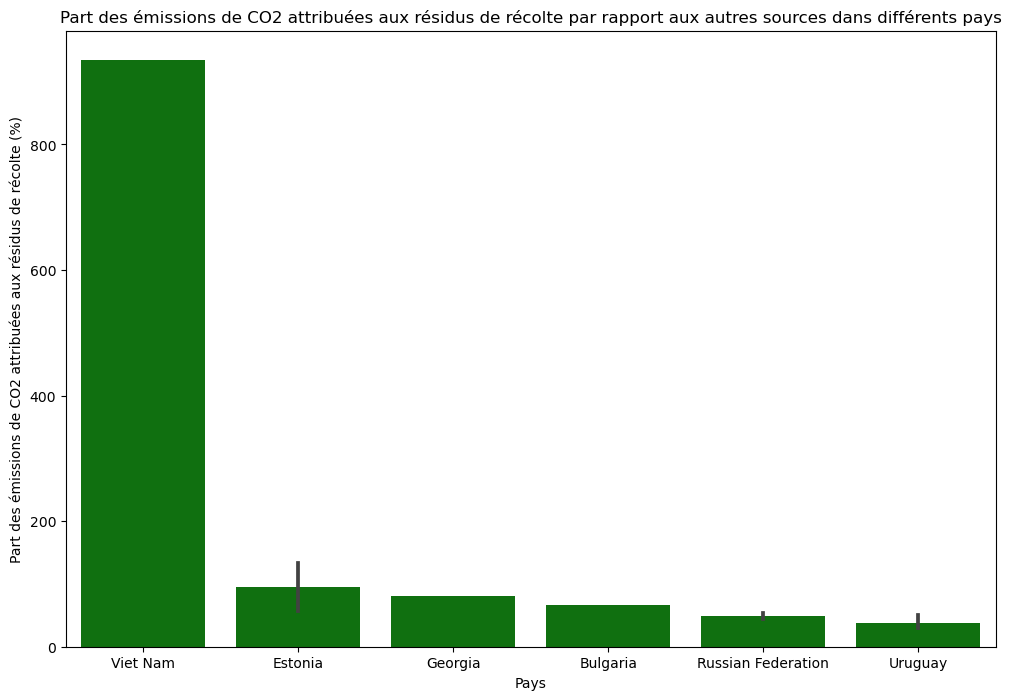

In [17]:
# Sélectionner les colonnes pertinentes pour l'analyse
selected_columns = ['Area', 'Crop Residues', 'total_emission']

# Supprimer les lignes avec des valeurs manquantes dans ces colonnes
data_cleaned = df_2000_2020[selected_columns].dropna()

# Calculer la part des émissions de CO2 attribuées aux résidus de récolte par rapport aux émissions totales pour chaque pays
data_cleaned['Crop Residues Share'] = (data_cleaned['Crop Residues'] / data_cleaned['total_emission']) * 100

# Trier les données par ordre décroissant de la part des émissions attribuées aux résidus de récolte
sorted_data = data_cleaned.sort_values(by='Crop Residues Share', ascending=False)

# Sélectionner les 10 premiers pays avec la part la plus élevée
top_10_countries = sorted_data.head(10)

# Inverser l'ordre des données pour la visualisation (pas nécessaire si on veut simplement le top 10 dans l'ordre décroissant)
# top_10_countries = top_10_countries.iloc[::-1]

# Créer une visualisation pour montrer la part des émissions de CO2 attribuées aux résidus de récolte par rapport aux autres sources dans différents pays
plt.figure(figsize=(12, 8))
sns.barplot(x='Area', y='Crop Residues Share', data=top_10_countries, color='green')
plt.title("Part des émissions de CO2 attribuées aux résidus de récolte par rapport aux autres sources dans différents pays")
plt.ylabel("Part des émissions de CO2 attribuées aux résidus de récolte (%)")
plt.xlabel("Pays")
plt.show()

Le graphique illustre la part relative des émissions de CO2 attribuées aux résidus de récolte par rapport aux autres sources d'émissions dans différents pays. Le Vietnam se distingue avec une proportion extrêmement élevée, ce qui suggère que les résidus de récolte représentent une source significative de ses émissions agricoles. Cela pourrait être dû à des pratiques de gestion des résidus de récolte qui ne sont pas optimisées pour la réduction des émissions de CO2. Les autres pays affichés, bien que présentant une part plus faible, montrent tout de même que les résidus de récolte sont une source d'émission à ne pas négliger. Pour ces pays, il existe un potentiel d'amélioration dans la gestion des résidus de récolte afin de réduire leur impact global sur les émissions de CO2.

### Question 2.8 : Carte du monde qui montre les émissions totales de C02 par pays lors des 20 dernières années

### À noter
#### Commentaire de non plagiat
Cette dernière question a été effectuée avec l'appuie de Chat GPT 4 pour la marche à suivre afin d'effectuer une visualisation de la carte du monde. Ainsi, la librairie geopandas n'a pas été vu en classe mais utilisée ici pour nous permettre de construire notre code. 

Cette question ainsi que sa visualisation était importante pour nous étant donné la portée mondiale de notre sujet de recherche. Il nous apparaissait évident de montrer les émission totales de CO2 par pays grâce à cette carte du monde. Elle permet ainsi de se rendre compte plus facilement des disparitées d'emission de CO2 à travers le monde.

In [18]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


C:\Users\ameli\AppData\Local\Temp\ipykernel_15616\2817287081.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


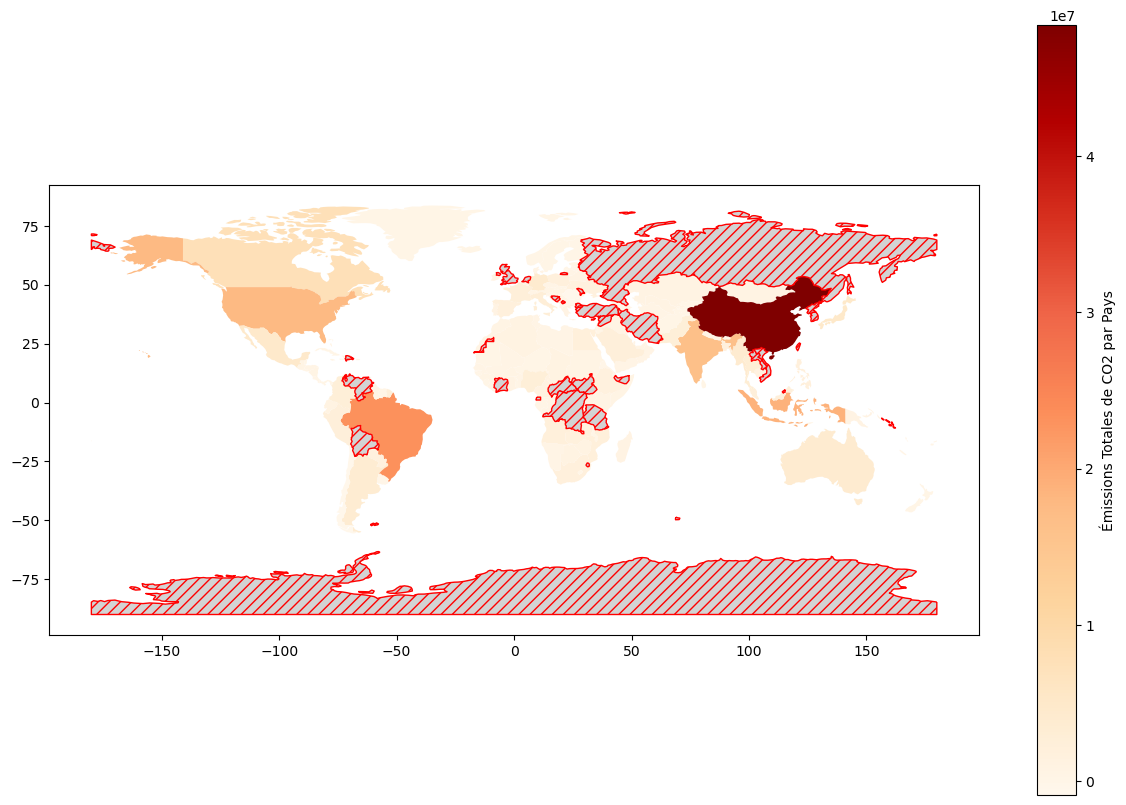

In [20]:
import geopandas as gpd

# Grouper les données par pays et calculer les émissions totales
total_co2_by_country = df_2000_2020.groupby('Area')['total_emission'].sum().reset_index()

# Charger un jeu de données géographiques des pays 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
 
# Fusionner les données émissions avec les données géographiques
merged = world.set_index('name').join(total_co2_by_country.set_index('Area'))

# Tracer la carte en utilisant les émissions totales de CO2 pour colorer les pays
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='total_emission', ax=ax, legend=True,
            legend_kwds={'label': "Émissions Totales de CO2 par Pays"},
            cmap='OrRd', missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Données manquantes"
            })

# Afficher la carte
plt.show()

Cette carte avait pour but de visualiser les disparités d'émission de CO2 en fonction des pays dans le monde. Après réalisation de la carte, nous pouvons voir ici certains pays identifiés avec des hachures, représentant un manque dinformation dans les données. La Russie, par exemple, fait partie de ces pays hachuré et pourtant elle se retrouve quand même parmis les 20 pays avec les plus grandes contributions des sols organiques drainés aux émissions de CO2 agricoles. Ainsi en faisant le lien on peut voir que malgré le manques de données, ce pays fait partie des plus polluants et le serait en réalité encore plus que ce que nous montre les graphiques effectué plus tôt dans notre analyse. 

Finalement, cette carte nous montre aussi la limite de notre étude puisquque malgré des questions d'analyse pertinente et la réalisation de différentes visualisations, l'exactitude et la profondeur de nos résultats dépendent de la quantité de données qui ont pu être récolter sur les différents pays du monde. 

# Conclusion d'analyse : Apprentissages suite à notre analyse

La période de 2000 à 2020 a été marquée par une croissance significative des émissions de CO2, illustrée par les augmentations observées tant dans les émissions totales que dans celles liées aux activités agricoles, soulignant une tendance préoccupante pour le climat global (Question 1.1 et 1.2). L'examen des sources d'émissions a révélé que les feux de forêt et l'utilisation d'énergie dans les exploitations agricoles étaient des contributeurs notables, indiquant des secteurs où des efforts de durabilité pourraient être particulièrement efficaces (Question 1.2). Sur le plan géographique, la Chine et les États-Unis figurent en tête des émetteurs de CO2 agricoles, pointant vers des cibles potentielles pour des initiatives de réduction des émissions (Question 1.3). Cependant, les tentatives de corréler directement les émissions de CO2 aux variations de température moyenne n'ont pas montré de lien linéaire clair (Question 1.4), et les impacts des émissions sur les phénomènes climatiques extrêmes, tels que les incendies, restent complexes et nécessitent une étude plus approfondie (Question 1.5). Ces résultats indiquent l'importance de stratégies globales pour atténuer le changement climatique, tout en ciblant des actions spécifiques dans le secteur agricole pour réduire l'empreinte carbone.

Au fil des deux dernières décennies, les émissions de CO2 dans le secteur agroalimentaire ont montré des tendances distinctes à travers le monde. L'analyse des données a révélé que les émissions attribuables aux activités agricoles et aux pratiques telles que la culture du riz et la gestion des sols organiques drainés ont contribué de manière significative à l'empreinte carbone globale (Questions 2.4 et 2.5). Certains pays, notamment l'Indonésie, la Russie et les États-Unis, ont été identifiés comme les principaux contributeurs, soulignant la nécessité d'actions ciblées dans ces régions (Question 2.5). Malgré une baisse de la population rurale globale, les émissions moyennes de CO2 par habitant dans ces zones ont augmenté (Question 2.3), indiquant des défis croissants en matière de pratiques agricoles durables. La culture du riz, en particulier, a connu des variations dans ses émissions de CO2, suggérant l'impact de l'intensification agricole et des méthodes de gestion des résidus de récolte. La cartographie mondiale des émissions de CO2 a mis en évidence des inégalités géographiques, avec des implications importantes pour les politiques environnementales et le développement durable (Question 2.8). Ensemble, ces conclusions appellent à une réflexion stratégique sur la manière dont l'agriculture moderne peut s'adapter et s'atténuer pour faire face aux défis du changement climatique.